In [1]:
import concurrent
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt


In [2]:
path = "/home/vasily/Projects/empirica_traveling_flame/chemistry/mechanisms/merino_66_mech/Skeletal_66-SD_20161214.yaml"

In [3]:
gas = ct.Solution(path)

/tmp/ipykernel_49623/1838067439.py:1: UserWarning: NasaPoly2::validate: 
For species CH2CH2OH, discontinuity in cp/R detected at Tmid = 1000
	Value computed using low-temperature polynomial:  15.107838949
	Value computed using high-temperature polynomial: 15.385775331099998

  gas = ct.Solution(path)
/tmp/ipykernel_49623/1838067439.py:1: UserWarning: NasaPoly2::validate: 
For species CH2CH2OH, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  4.688575616966668
	Value computed using high-temperature polynomial: 4.64839243407

  gas = ct.Solution(path)
/tmp/ipykernel_49623/1838067439.py:1: UserWarning: NasaPoly2::validate: 
For species CH3CHOH, discontinuity in cp/R detected at Tmid = 1000
	Value computed using low-temperature polynomial:  14.825843632999998
	Value computed using high-temperature polynomial: 15.109926177800002

  gas = ct.Solution(path)
/tmp/ipykernel_49623/1838067439.py:1: UserWarning: NasaPoly2::validate: 
For species CH3C

In [4]:

Y_air_N2= 0.767
Y_air_O2= 0.233


In [5]:
def sim_flame(gas, T, P, Y_fuel):
    gas.TPY = T, P,  {"N2" : Y_air_N2 * (1-Y_fuel), "O2" : Y_air_O2 * (1-Y_fuel), "C2H5OH" : Y_fuel} 
    f=ct.FreeFlame(gas,width=0.4)
    # f.set_max_time_step(1000)
    f.set_refine_criteria(ratio=3,slope=0.06,curve=0.12)
    # f.transport_model='Multi'
    f.solve(0,auto=True,refine_grid=True)
    return f

In [6]:
def job(T, Y):
    gas = ct.Solution(path)
    f = sim_flame(gas, T, 1e5, Y)
    return T, Y, np.array(f.grid), np.array(f.velocity), np.array(f.T), np.array(f.Y)

In [7]:
Ys = np.linspace(0.04, 0.085, 8)
# T = 300
Ts = [300, 293, 310, 330]

In [16]:
ress = [[] for _ in range(4)]

In [24]:
for i in range(0, len(Ts)):
    print(i)
    for j in range(0, len(Ys)):
        print(j)
        ress[i].append(sim_flame(gas, Ts[i], 1e5, Ys[j]))

1
0
1
2
3
4
5
6
7
2
0
1
2
3
4
5
6
7
3
0
1
2
3
4
5
6
7


In [25]:
ress

[[<cantera.onedim.FreeFlame at 0x77aafdb776c0>,

In [26]:
import pickle

In [28]:
def save():
    rn = [[(np.array(f.grid), np.array(f.velocity), np.array(f.T), np.array(f.Y)) for f in i] for i in ress]

    obj = np.array(Ts), np.array(Ys), rn
    pickle.dump(obj, open("flame_speed_plots_calc.pickle", "wb"))

In [29]:
save()

In [ ]:
rn = None
Ts = None
Ys = None

In [30]:
def load():
    global Ts, Ys, rn
    Ts, Ys, rn = pickle.load( open("flame_speed_plots_calc.pickle", "rb"))

In [31]:
load()

Text(0, 0.5, '$S_L$, см/c')

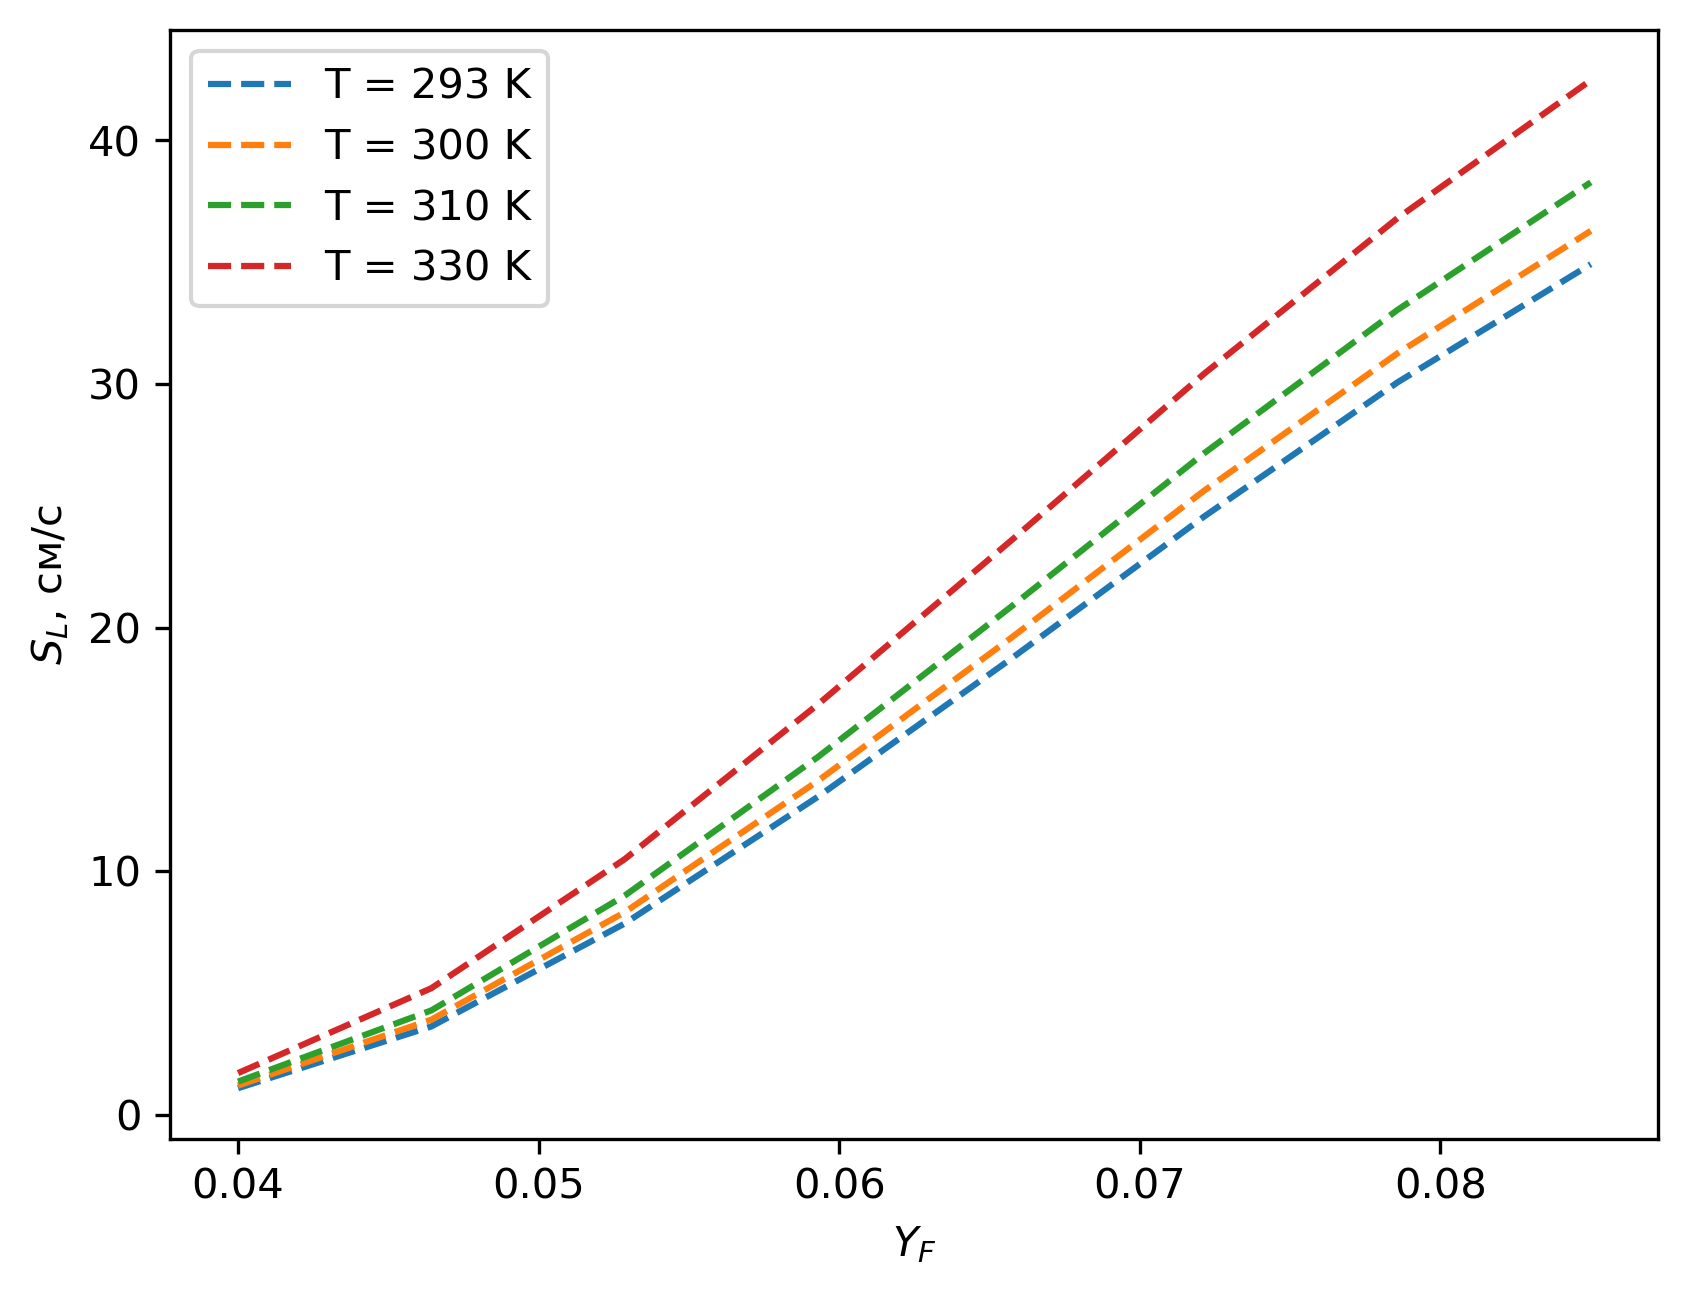

In [54]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

for i in range(len(Ts)):
    plt.plot(Ys, [f[1][0]*100 for f in rn[i]], "--", label=f"T = {Ts[i]:.0f} K")
plt.legend()
plt.xlabel("$Y_F$")
plt.ylabel("$S_L$, см/c")
